## Import All Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Dataset

In [5]:
file_path="Bank_Personal_Loan_Modelling.csv"

**Show the Dataset**

In [12]:
df_original= pd.read_csv(file_path)
df_original.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [14]:
df_original.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0/80,1,0,0,0,0,1,1


**Cleaning the data**

In [18]:
id_zip_columns = df_original[['ID','ZIP Code']].copy()

In [20]:
# --- Step 1: Clean the Data ---
df_cleaned = df_original.copy()
# Convert 'CCAvg' from 'X/YY' to float (e.g., '1/60' to 1.60)
df_cleaned['CCAvg'] = df_cleaned['CCAvg'].str.replace('/', '.').astype(float)

In [22]:
# Correct negative values in 'Experience' (invalid for work experience)
df_cleaned['Experience'] = df_cleaned['Experience'].apply(lambda x: abs(x) if x < 0 else x)

In [24]:
# Drop duplicates and 'ID' column
df_cleaned = df_cleaned.drop_duplicates().drop(columns=['ID', 'ZIP Code'], errors='ignore')

In [26]:
df_cleaned.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [28]:
df_cleaned.shape

(5000, 12)

In [30]:
df_cleaned.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [34]:
df_cleaned.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [36]:
categorical_columns = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [38]:
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Numerical Columns: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


### Exploratory Data Analysis (EDA)

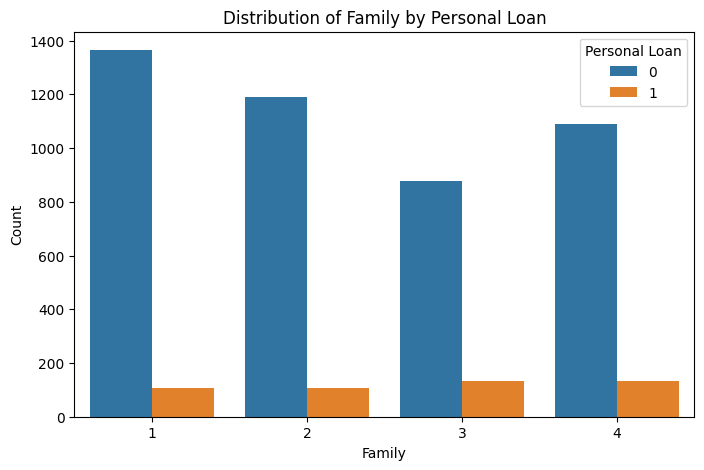

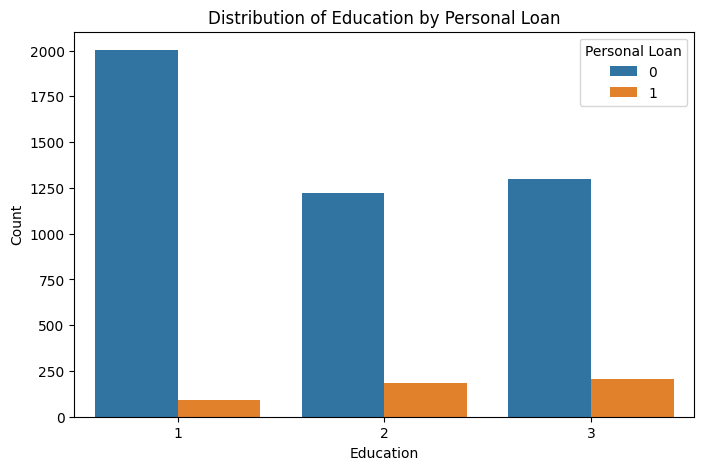

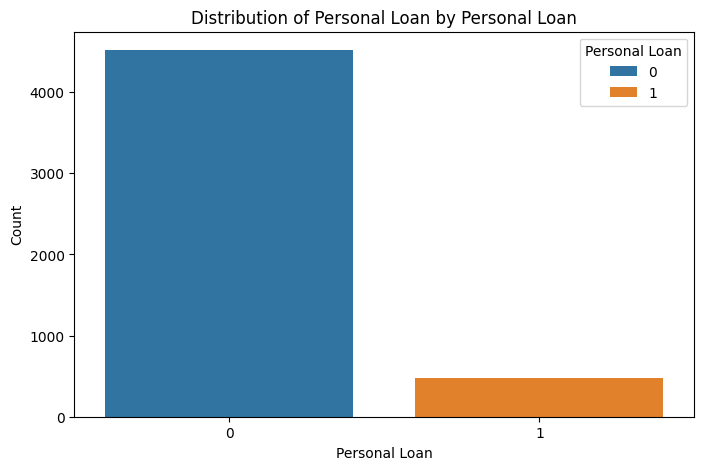

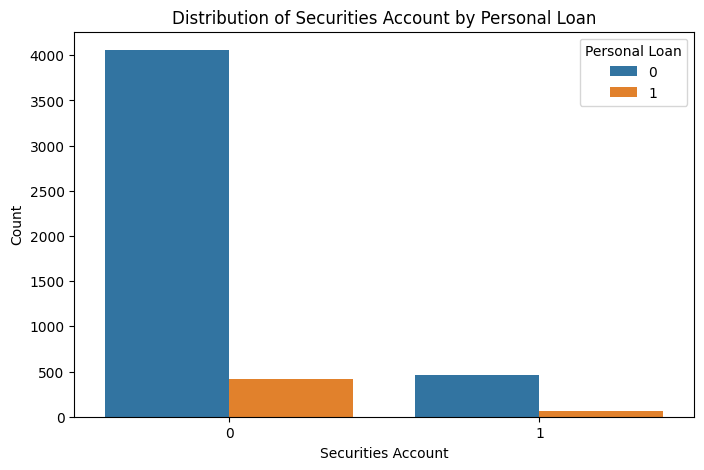

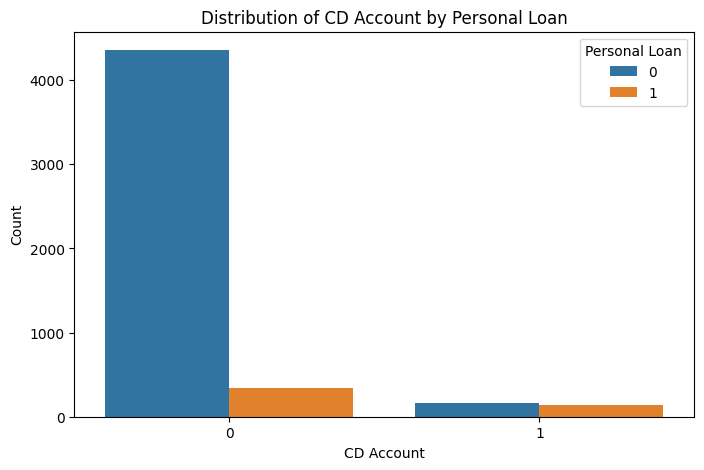

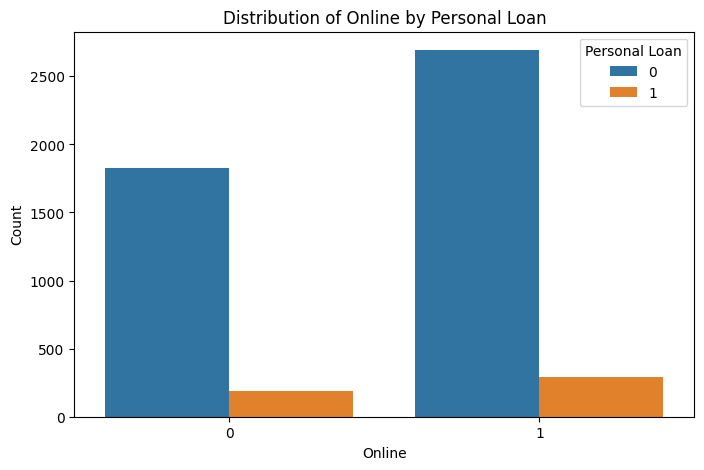

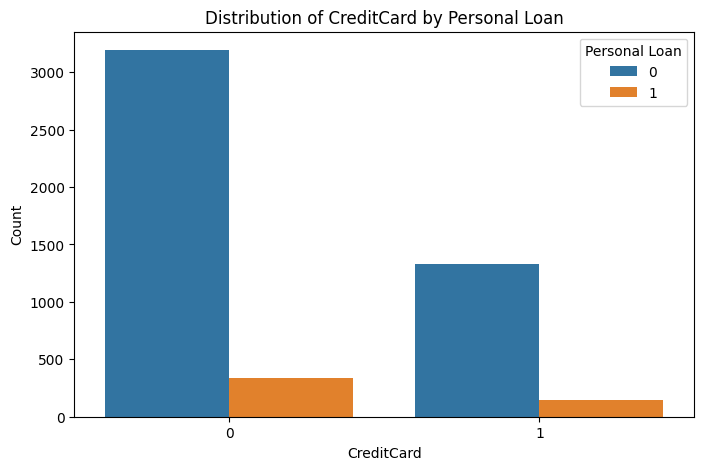

In [45]:
# --- Categorical Columns Analysis ---
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Personal Loan', data=df_cleaned)
    plt.title(f'Distribution of {column} by Personal Loan')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

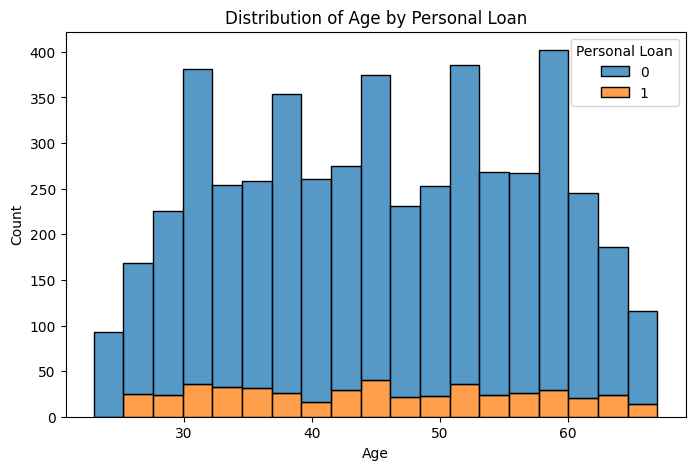

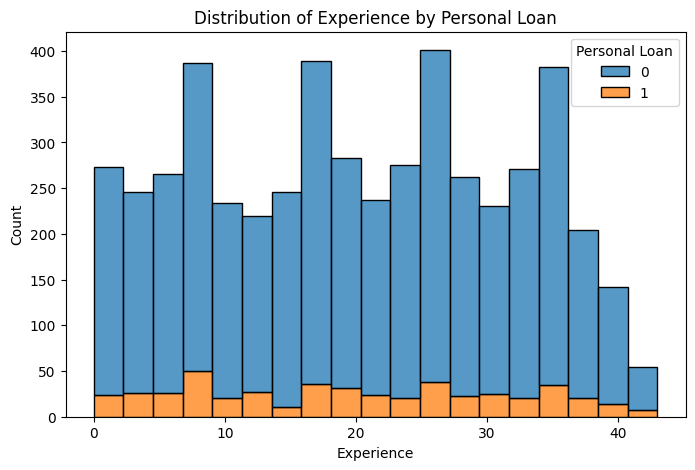

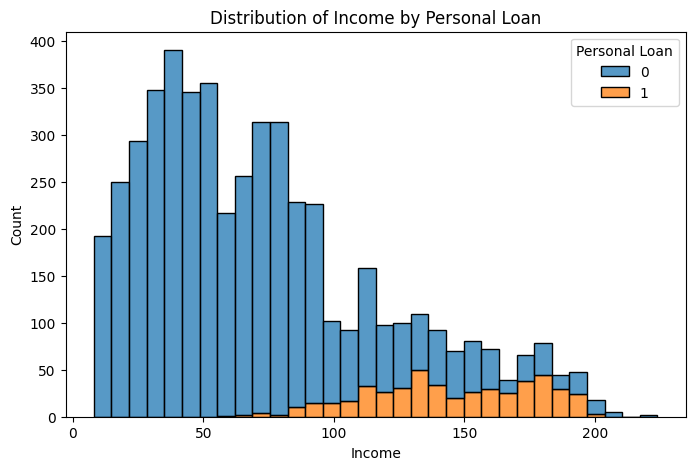

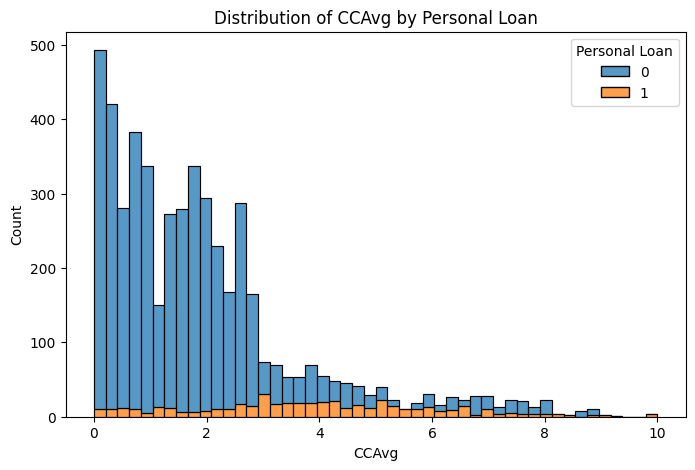

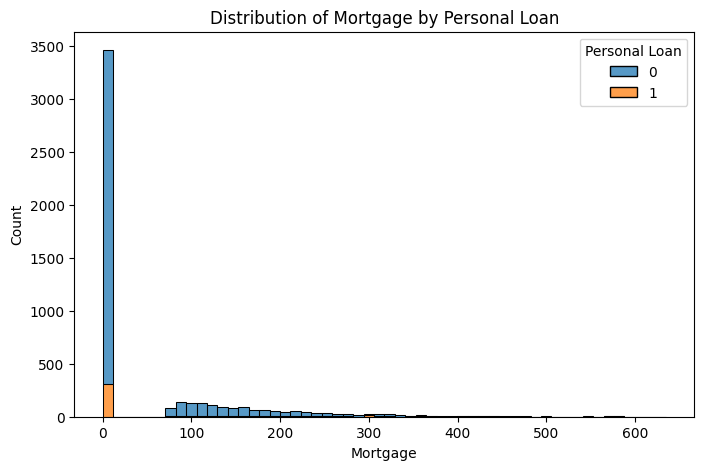

In [47]:
#--- Numerical Columns Analysis ---
# Histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_cleaned, x=column, hue='Personal Loan', multiple='stack')
    plt.title(f'Distribution of {column} by Personal Loan')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

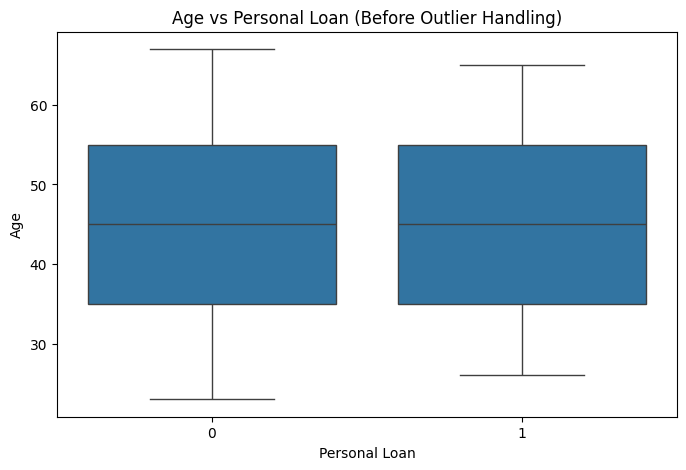

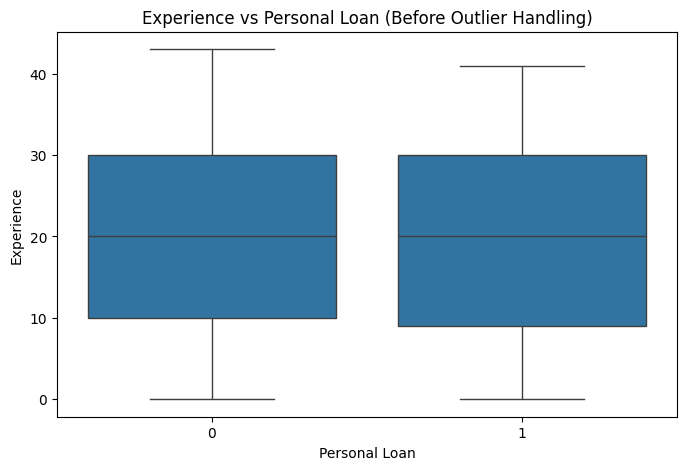

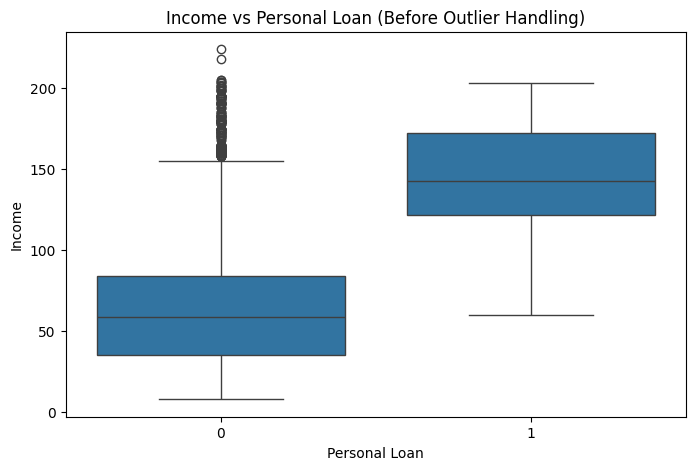

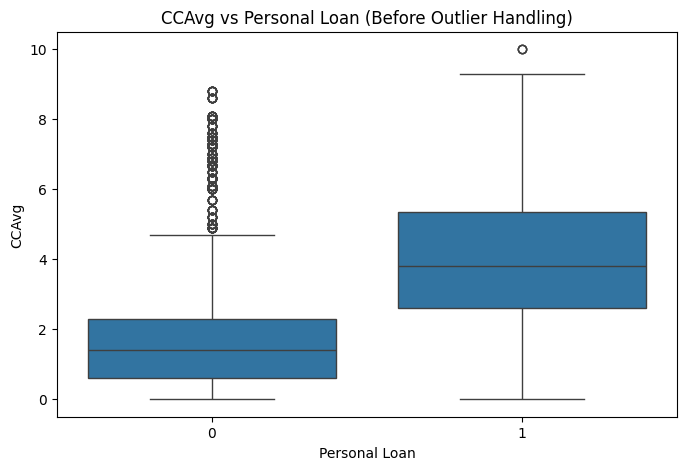

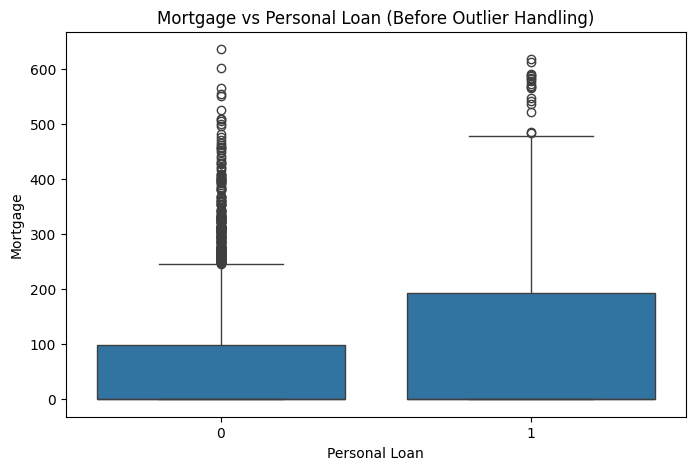

In [34]:
# Box plots for numerical columns vs Personal Loan Before outlier handling
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Personal Loan', y=column, data=df_cleaned)
    plt.title(f'{column} vs Personal Loan (Before Outlier Handling)')
    plt.xlabel('Personal Loan')
    plt.ylabel(column)
    plt.show()

In [61]:
# Replace outliers with median using IQR
for column in numerical_columns:
    q1 = np.percentile(df_cleaned[column], 25)
    q2 = np.percentile(df_cleaned[column], 50)
    q3 = np.percentile(df_cleaned[column], 75)
    iqr = q3 - q1 
        
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    con1 = df_cleaned[column]<lb
    con2 = df_cleaned[column]>ub
    con = con1 | con2
    outlier_count = con.sum()
    print(f"{column} - Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}, Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}, Outliers: {outlier_count}")
    df_cleaned[column] = np.where(con, q2, df_cleaned[column])
    print(f"Replaced {outlier_count} outliers in {column} with median: {q2:.2f}")

Age - Q1: 35.00, Q3: 55.00, IQR: 20.00, Lower Bound: 5.00, Upper Bound: 85.00, Outliers: 0
Replaced 0 outliers in Age with median: 45.00
Experience - Q1: 10.00, Q3: 30.00, IQR: 20.00, Lower Bound: -20.00, Upper Bound: 60.00, Outliers: 0
Replaced 0 outliers in Experience with median: 20.00
Income - Q1: 39.00, Q3: 83.00, IQR: 44.00, Lower Bound: -27.00, Upper Bound: 149.00, Outliers: 0
Replaced 0 outliers in Income with median: 64.00
CCAvg - Q1: 0.70, Q3: 2.00, IQR: 1.30, Lower Bound: -1.25, Upper Bound: 3.95, Outliers: 0
Replaced 0 outliers in CCAvg with median: 1.50
Mortgage - Q1: 0.00, Q3: 0.00, IQR: 0.00, Lower Bound: 0.00, Upper Bound: 0.00, Outliers: 0
Replaced 0 outliers in Mortgage with median: 0.00


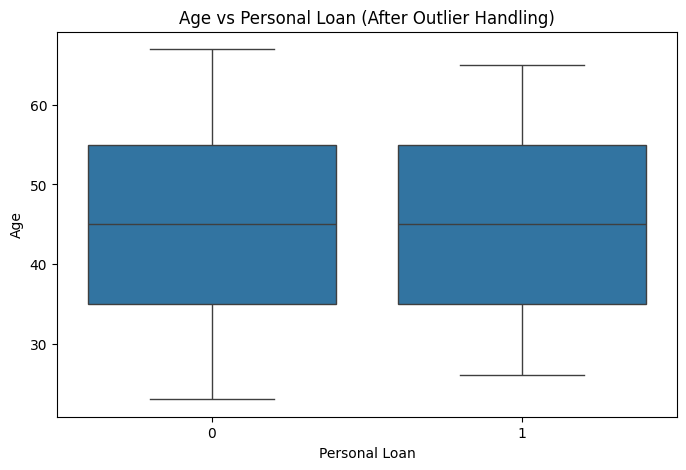

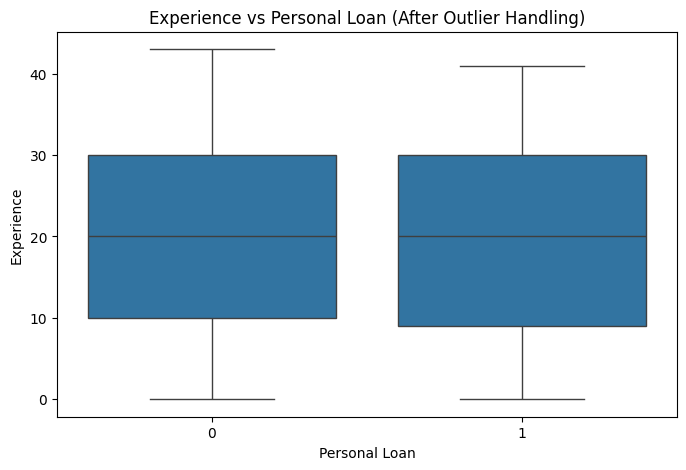

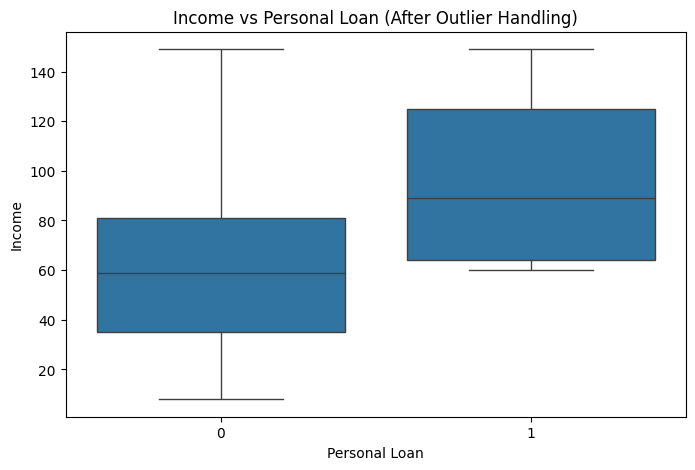

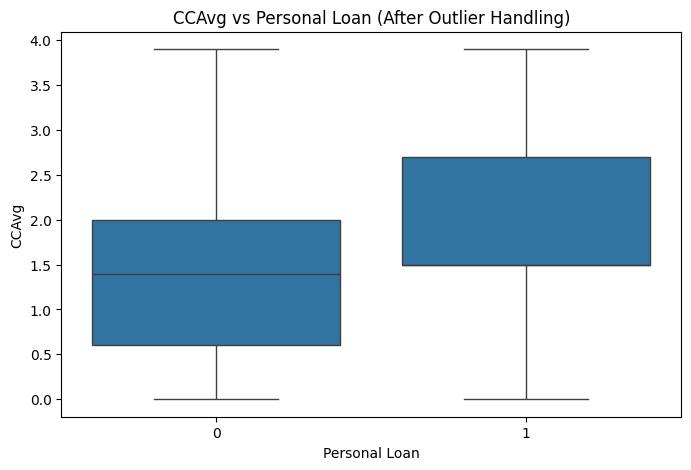

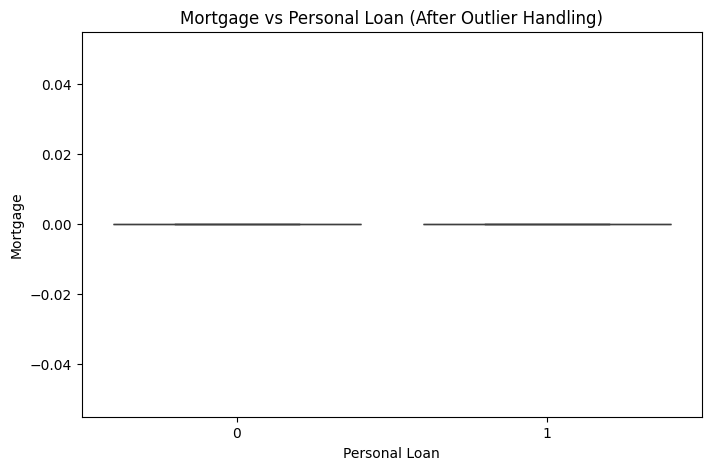

In [63]:
# Plot Box Plots after Outlier Handling
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Personal Loan', y=column, data=df_cleaned)
    plt.title(f'{column} vs Personal Loan (After Outlier Handling)')
    plt.xlabel('Personal Loan')
    plt.ylabel(column)
    plt.show()

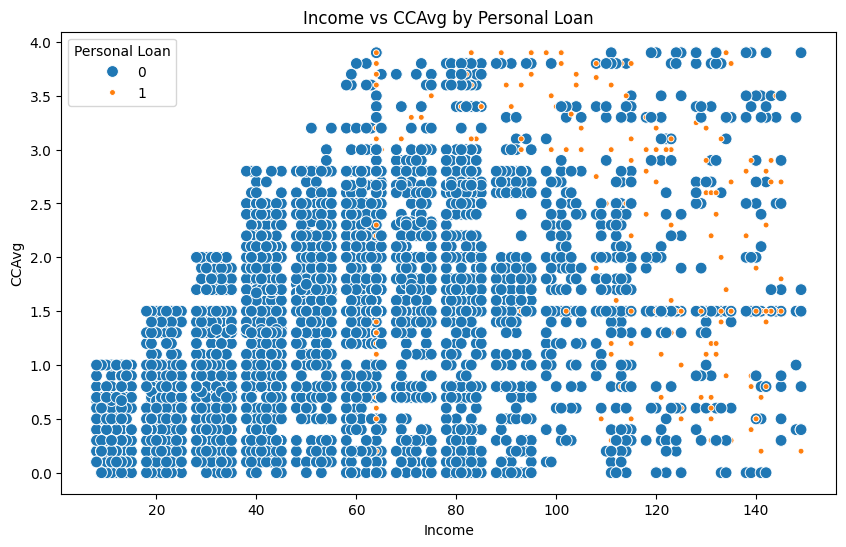

In [65]:
# Scatter plot for Income vs CCAvg colored by Personal Loan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='CCAvg', hue='Personal Loan', size='Personal Loan', data=df_cleaned)
plt.title('Income vs CCAvg by Personal Loan')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.show()

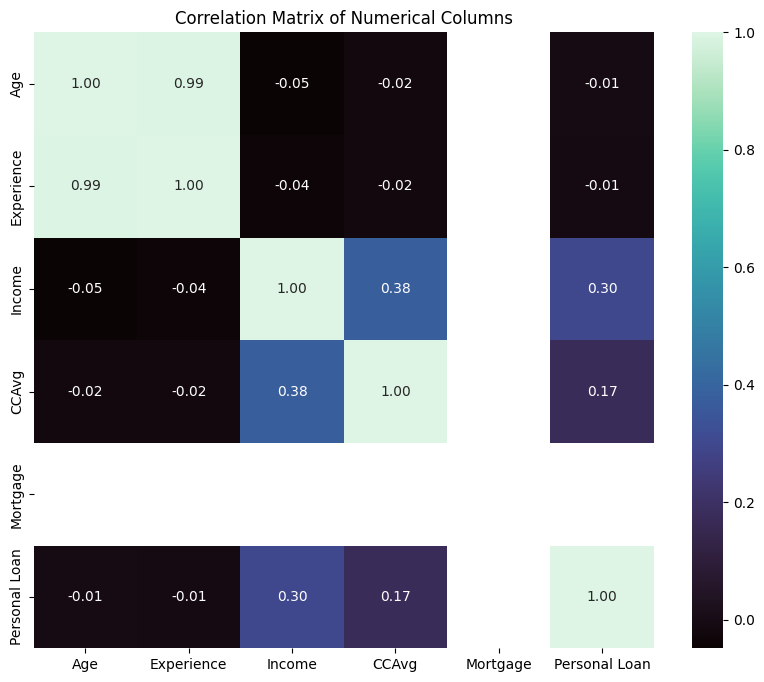

In [67]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_columns + ['Personal Loan']].corr(), annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.savefig('correlation_matrix.png')
plt.show()

In [70]:
df_final = df_cleaned.copy()

df_final.insert(0, 'ID', id_zip_columns['ID'])
df_final.insert(1, 'ZIP Code', id_zip_columns['ZIP Code'])

### Final save the Cleaned Dataset

In [73]:
df_final.to_csv('cleaned_bank_loan_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_bank_loan_data.csv'")

Cleaned dataset saved as 'cleaned_bank_loan_data.csv'
